In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

In [31]:
sns.set_palette('Paired')

In [32]:
df = pd.read_csv('data/cleaned_dataset_3.csv', index_col='customerID')
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.277,0,0,0,1,0,0,0,0,1,-1.160,False,1,0,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,0.066,1,0,1,0,1,0,0,0,0,-0.260,False,0,1,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,-1.237,1,0,1,1,0,0,0,0,1,-0.363,True,0,1,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,0.514,0,0,1,0,1,1,0,0,0,-0.746,False,0,1,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,-1.237,1,0,0,0,0,0,0,0,1,0.197,True,1,0,0,1,0,1,0,0,0,0,1,0


In [33]:
#Split dataset into train and test partitions
#Labels
y = df['Churn']

#Features
X = df.drop(columns=['Churn'])

In [34]:
#Sparse values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
Y[0:5]

array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5634, 26) (5634, 2)
(1409, 26) (1409, 2)


In [36]:
#Create Neural Network classification model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(10, input_shape=(X.shape[1],), activation='tanh'))
model.add(Dense(6, activation='tanh'))

model.add(Dense(Y.shape[1], activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.metrics_names)

model.summary()

['loss', 'acc']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 14        
Total params: 350
Trainable params: 350
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Fit and predict model
batch_size = 32
epochs = 20

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size,epochs=epochs, verbose=1)

Train on 5634 samples, validate on 1409 samples
Epoch 1/20
5634/5634 [==============================] - 2s 309us/step - loss: 0.4632 - acc: 0.7806 - val_loss: 0.4016 - val_acc: 0.8141
Epoch 2/20
5634/5634 [==============================] - 1s 97us/step - loss: 0.4309 - acc: 0.7989 - val_loss: 0.3986 - val_acc: 0.8141
Epoch 3/20
5634/5634 [==============================] - 1s 100us/step - loss: 0.4268 - acc: 0.8009 - val_loss: 0.3969 - val_acc: 0.8141
Epoch 4/20
5634/5634 [==============================] - 1s 97us/step - loss: 0.4245 - acc: 0.8012 - val_loss: 0.3997 - val_acc: 0.7999
Epoch 5/20
5634/5634 [==============================] - 1s 98us/step - loss: 0.4228 - acc: 0.7973 - val_loss: 0.3948 - val_acc: 0.8133
Epoch 6/20
5634/5634 [==============================] - 1s 95us/step - loss: 0.4217 - acc: 0.8024 - val_loss: 0.3952 - val_acc: 0.8141
Epoch 7/20
5634/5634 [==============================] - 1s 97us/step - loss: 0.4212 - acc: 0.8010 - val_loss: 0.3968 - val_acc: 0.8105
Epoch

In [39]:
#Evaluate the model
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

1409/1409 [==============================] - 0s 30us/step
Test loss: 0.394
Test accuracy: 0.811


In [40]:
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test_class, Y_pred_class))
print(confusion_matrix(Y_test_class, Y_pred_class))

             precision    recall  f1-score   support

          0       0.86      0.89      0.88      1061
          1       0.63      0.57      0.60       348

avg / total       0.81      0.81      0.81      1409

[[943 118]
 [149 199]]


In [41]:
#Create a graph of accuracy and loss over time
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

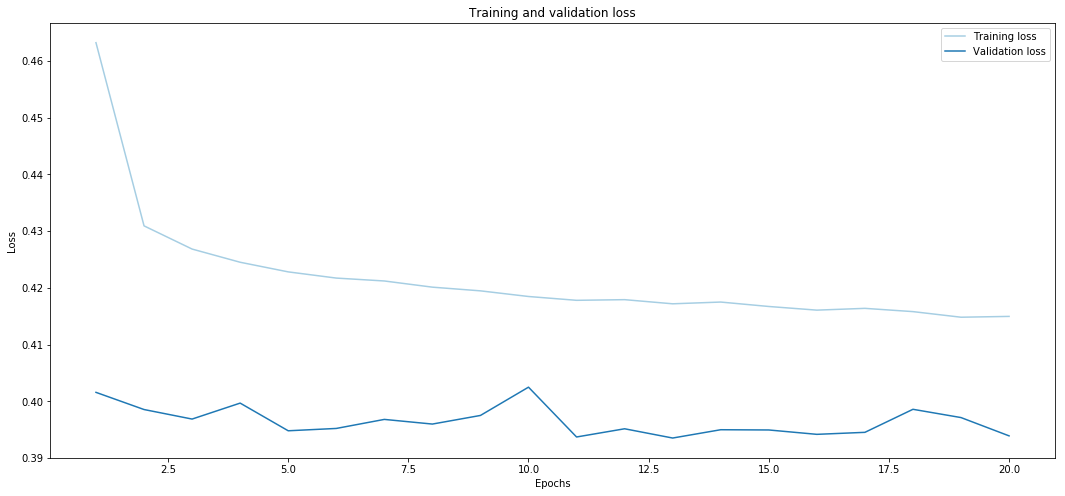

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(18,8))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

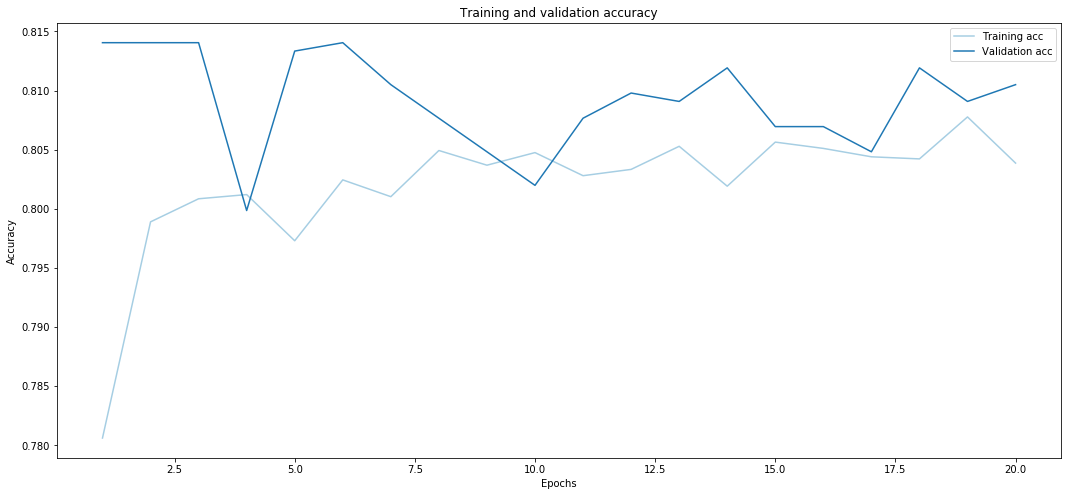

In [43]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.figure(figsize=(18,8))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()